In [1]:
import networkx
import numpy as np
import scipy as sp
import importlib
import quasibi
import glob
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from tqdm import tqdm
importlib.reload(quasibi);

In [2]:
qbo = pd.read_fwf("../data/qbo.txt", skiprows=9, header=None, usecols=[1, 8], index_col=0)
qbo.index = [datetime(year=1953 + month//12, month=month%12 + 1, day=1) for month in range(len(qbo))]
qbo = qbo[(qbo.index.year >= 1981) & (qbo.index.year < 2021)]
qbo = qbo[(qbo.index.month >= 10) | (qbo.index.month <= 3)]
qbo = qbo.groupby(qbo.index.year - (qbo.index.month <= 3)).mean()
qbo = qbo.to_numpy().flatten()

In [3]:
pearson_files = glob.glob("../output/dynamic/pearson*")
rmd_files = glob.glob("../output/dynamic/rmd*")

In [97]:
def average_path_length(nx):
    lengths = np.array([np.trim_zeros(np.fromiter(x[1].values(), dtype="float32")).mean() for x in networkx.shortest_path_length(nx)])
    return np.nanmean(lengths)

In [110]:
M = np.zeros((len(pearson_files), 3))

last = None

for i, pearson_file in tqdm(enumerate(pearson_files), total=41):
    pearson = quasibi.load_symmat(pearson_file)
    pearson = np.abs(pearson) >= np.quantile(np.abs(pearson), 0.995)

    net = networkx.from_numpy_matrix(pearson)

    # average path length
    M[i, 0] = networkx.average_clustering(net)

    # average path length
    M[i, 1] = average_path_length(networkx.from_numpy_matrix(pearson))

    # centrality
    M[i, 2] = np.fromiter(networkx.closeness_centrality(net).values(), dtype="float32").mean()
    
M = (M - np.mean(M, axis=0))/np.std(M, axis=0)

  0%|                                                    | 0/41 [00:00<?, ?it/s]/var/folders/hd/zvzpfrkd3j7dmtgkz1ghzq200000gn/T/ipykernel_50168/701463014.py:2: RuntimeWarning: Mean of empty slice.
  lengths = np.array([np.trim_zeros(np.fromiter(x[1].values(), dtype="float32")).mean() for x in networkx.shortest_path_length(nx)])
100%|███████████████████████████████████████████| 41/41 [00:32<00:00,  1.26it/s]


/var/folders/hd/zvzpfrkd3j7dmtgkz1ghzq200000gn/T/ipykernel_50168/289982579.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([] if i < 2 else time)


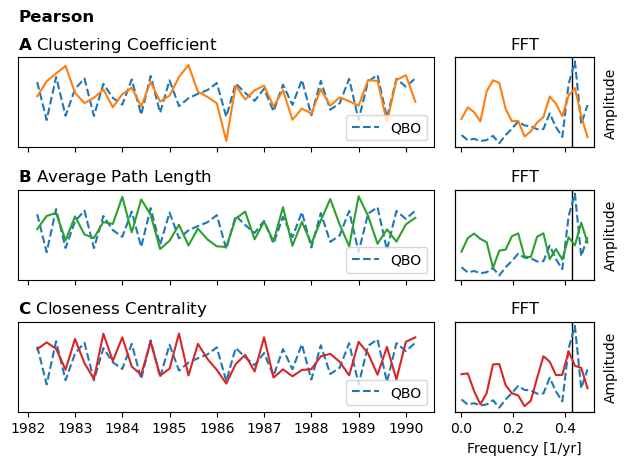

In [111]:
fig, axs = plt.subplots(3, 2, gridspec_kw={"width_ratios": [3, 1]})

time = np.arange(1981, 2022)

for i, (m, ax) in enumerate(zip(M.T, axs.T[0])):
    ax.plot(time, (qbo - np.mean(qbo))/np.std(qbo), ls="--", label="QBO")
    ax.plot(time, m, c="C"+str(i+1))
    ax.set_title(r"$\bf{" + ["A", "B", "C"][i] + "}$ " + ["Clustering Coefficient", "Average Path Length", "Closeness Centrality"][i], loc="left")
    ax.set_yticks([])
    ax.set_ylim([-3.5, 2.5])
    ax.set_xticklabels([] if i < 2 else time)
    ax.legend(loc="lower right")
    #ax.imshow(np.expand_dims(qbo, 1).T, extent=[-0.5, 39.5, -2.5, 2.5], cmap="coolwarm", vmin=-310, vmax=310)


for i, (m, ax) in enumerate(zip(M.T, axs.T[1])):
    
    ax.axvline(12/28, c="black", zorder=0, lw=1)
    ax.magnitude_spectrum((qbo - np.mean(qbo))/np.std(qbo), Fs=1, ls="--")
    ax.magnitude_spectrum(m, Fs=1, c="C"+str(i + 1))
    
    ax.set_title("FFT")
    
    ax.set_yticks([])
    ax.set_ylabel("")
    axt = ax.twinx()
    axt.set_yticks([])
    axt.set_ylabel("Amplitude")
    
    if i == 2:
        ax.set_xlabel("Frequency [1/yr]")
    else:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    
    pass

plt.suptitle("Pearson", horizontalalignment="left", x=0.04, y=0.96, fontweight="bold")
plt.tight_layout()
plt.savefig("../plots/dynamic_pearson.pdf", bbox_inches="tight")

In [112]:
M = np.zeros((len(pearson_files), 3))

last = None

for i, pearson_file in tqdm(enumerate(rmd_files), total=41):
    pearson = quasibi.load_symmat(pearson_file)
    pearson = np.abs(pearson) >= np.quantile(np.abs(pearson), 0.995)

    net = networkx.from_numpy_matrix(pearson)

    # average path length
    M[i, 0] = networkx.average_clustering(net)

    # average path length
    M[i, 1] = average_path_length(networkx.from_numpy_matrix(pearson))

    # centrality
    M[i, 2] = np.fromiter(networkx.closeness_centrality(net).values(), dtype="float32").mean()
    
M = (M - np.mean(M, axis=0))/np.std(M, axis=0)

  0%|                                                    | 0/41 [00:00<?, ?it/s]/var/folders/hd/zvzpfrkd3j7dmtgkz1ghzq200000gn/T/ipykernel_50168/701463014.py:2: RuntimeWarning: Mean of empty slice.
  lengths = np.array([np.trim_zeros(np.fromiter(x[1].values(), dtype="float32")).mean() for x in networkx.shortest_path_length(nx)])
100%|███████████████████████████████████████████| 41/41 [00:36<00:00,  1.13it/s]


/var/folders/hd/zvzpfrkd3j7dmtgkz1ghzq200000gn/T/ipykernel_50168/3912167763.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([] if i < 2 else time)


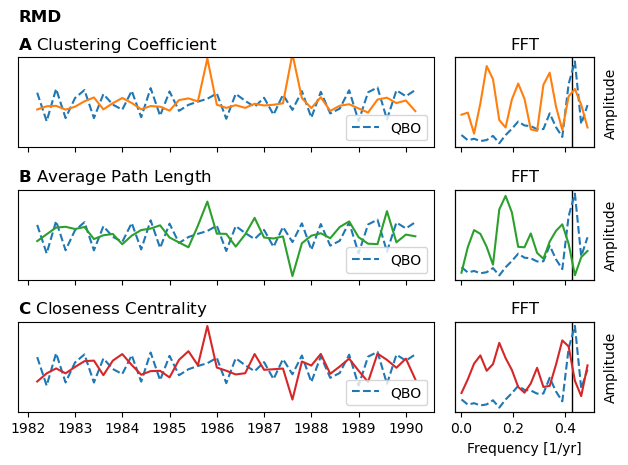

In [118]:
fig, axs = plt.subplots(3, 2, gridspec_kw={"width_ratios": [3, 1]})

time = np.arange(1981, 2022)

for i, (m, ax) in enumerate(zip(M.T, axs.T[0])):
    ax.plot(time, (qbo - np.mean(qbo))/np.std(qbo), ls="--", label="QBO")
    ax.plot(time, m, c="C"+str(i+1))
    ax.set_title(r"$\bf{" + ["A", "B", "C"][i] + "}$ " + ["Clustering Coefficient", "Average Path Length", "Closeness Centrality"][i], loc="left")
    ax.set_yticks([])
    ax.set_ylim([-4, 4])
    ax.set_xticklabels([] if i < 2 else time)
    ax.legend(loc="lower right")
    #ax.imshow(np.expand_dims(qbo, 1).T, extent=[-0.5, 39.5, -2.5, 2.5], cmap="coolwarm", vmin=-310, vmax=310)


for i, (m, ax) in enumerate(zip(M.T, axs.T[1])):
    
    ax.axvline(12/28, c="black", zorder=0, lw=1)
    ax.magnitude_spectrum((qbo - np.mean(qbo))/np.std(qbo), Fs=1, ls="--")
    ax.magnitude_spectrum(m, Fs=1, c="C"+str(i + 1))
    
    ax.set_title("FFT")
    
    ax.set_yticks([])
    ax.set_ylabel("")
    axt = ax.twinx()
    axt.set_yticks([])
    axt.set_ylabel("Amplitude")
    
    if i == 2:
        ax.set_xlabel("Frequency [1/yr]")
    else:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    
    pass

plt.suptitle("RMD", horizontalalignment="left", x=0.04, y=0.96, fontweight="bold")
plt.tight_layout()
plt.savefig("../plots/dynamic_rmd.pdf", bbox_inches="tight")